C:\Users\Win11\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/10


C:\Users\Win11\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 119s 479ms/step - accuracy: 0.7393 - loss: 0.5135 - val_accuracy: 0.8850 - val_loss: 0.2882
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


C:\Users\Win11\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


240/240 ━━━━━━━━━━━━━━━━━━━━ 110s 455ms/step - accuracy: 0.9042 - loss: 0.2488 - val_accuracy: 0.9500 - val_loss: 0.1542
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 115s 476ms/step - accuracy: 0.9249 - loss: 0.2162 - val_accuracy: 0.9267 - val_loss: 0.2277
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 116s 478ms/step - accuracy: 0.9572 - loss: 0.1224 - val_accuracy: 0.9483 - val_loss: 0.1561
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 514ms/step - accuracy: 0.9636 - loss: 0.0935 - val_accuracy: 0.9417 - val_loss: 0.1707
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 88us

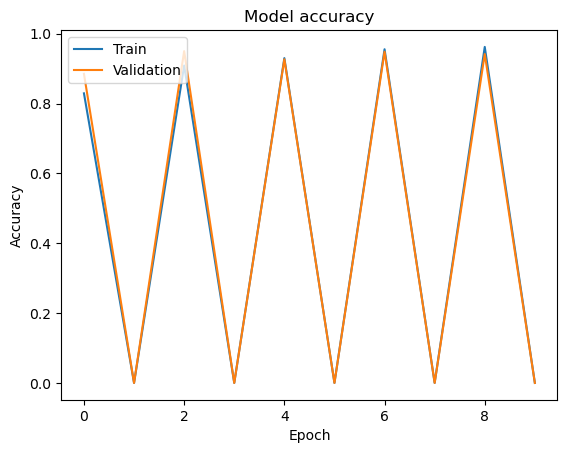

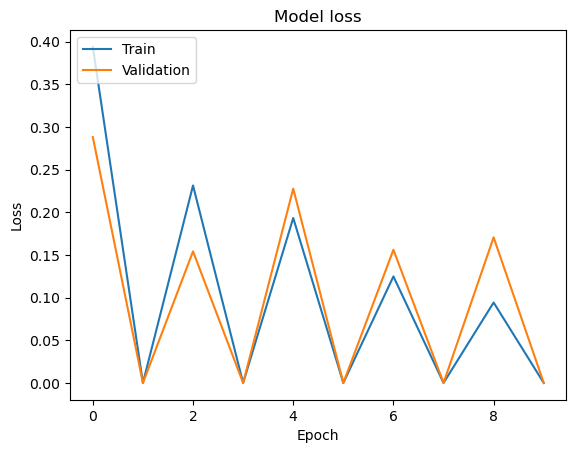

60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9516 - loss: 0.1570
Test Loss: 0.17065002024173737, Test Accuracy: 0.9416666626930237
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       300
           1       0.50      0.49      0.49       300

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9368 - loss: 0.2094
Test Loss: 0.17065003514289856, Test Accuracy: 0.9416666626930237
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       300
           1       0.50      0.54      0.52       300

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50

In [2]:
import os
import random
import shutil
from tqdm import tqdm
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

dataset_dir = "C:\\Users\\Win11\\OneDrive\\Desktop\\EEX_DATA"
train_dir = "C:\\Users\\Win11\\OneDrive\\Desktop\\MOD_TRAIN"
test_dir = "C:\\Users\\Win11\\OneDrive\\Desktop\\MOD_TEST"

batch_size = 10

input_shape = (256, 256, 3)  # Define the input shape for the images

num_epochs = 10  # Define the number of epochs for training

def create_model(input_shape):   # Define the model architecture
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = create_model(input_shape)   # Create the model

model.compile(optimizer='adam',     # Compile the model
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Create data generators for training and validation

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(test_generator)

# Print the evaluation results
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions on the testing dataset
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype('int32')

# Get true labels
true_classes = test_generator.classes

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(test_generator)

# Print the evaluation results
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions on the testing dataset
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.25).astype('int32')

# Get true labels
true_classes = test_generator.classes

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))




In [4]:
model.save('tb_detection_model.h5')